In [4]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [5]:
def draw_basic_graph(G):
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos)

    plt.show()


/Users/jmaddalena/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/jmaddalena/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


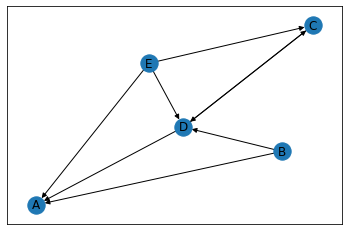

In [6]:
G = nx.DiGraph()

G.add_edges_from(
    [('B', 'A'), ('B', 'D'), ('C', 'D'), ('D', 'C'), ('D', 'A'), ('E', 'D'), ('E', 'C'), ('E', 'A')])

draw_basic_graph(G)

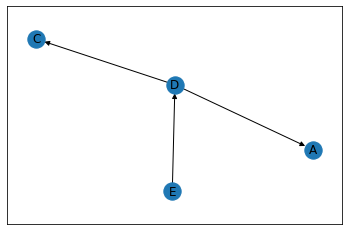

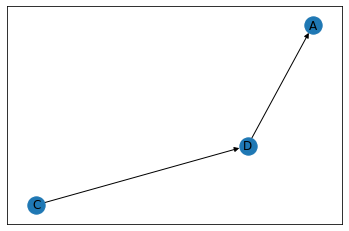

In [7]:
import networkx.algorithms.traversal.depth_first_search as dfs

T_E = dfs.dfs_tree(G, "E", 3)
draw_basic_graph(T_E)

T_C = dfs.dfs_tree(G, "C", 3)
draw_basic_graph(T_C)


In [8]:
node_order = ['A', 'B', 'C', 'D', 'E']

adj_mat = nx.adjacency_matrix(G, nodelist = node_order).todense()

adj_df = pd.DataFrame(adj_mat, index = node_order, columns= node_order)

adj_df.loc['E']

A    1
B    0
C    1
D    1
E    0
Name: E, dtype: int64

In [179]:

## recursive formula to gather all walks of a certain length starting with a given node
def walk_list_extend(adj_df, walk_list, walk_length):

    new_walk_list = []
    
    for nodes in walk_list:
     
        current_node_row = adj_df.loc[nodes[-1]]
        next_nodes = current_node_row.loc[current_node_row == 1].index
        
        if len(next_nodes) > 0:

            for next_node in next_nodes:
                new_walk = nodes + [next_node]
                new_walk_list.append(new_walk)
    
        else:
            new_walk = []
            
    if len(new_walk) == 0:
        return []
    elif len(new_walk) == walk_length:    
        return new_walk_list
    else: 
        return walk_list_extend(adj_df, new_walk_list, walk_length)    
    
def get_all_walks(adj_df, walk_length):
    all_start_nodes = adj_df.index
    
    all_walks = []
    
    for start_node in all_start_nodes:
        start_node_walks = walk_list_extend(adj_df, [[start_node]], walk_length)
    
        if len(start_node_walks) > 0:
            all_walks = all_walks + start_node_walks
        
    return all_walks
    
def compatable_rows(adj_df, row1, row2):
    
    # if row1 is actually a bed
    if len(np.array(row1).shape) > 1:
        row1 = row1[-1]
    
    compatability_list = []

    for i in range(len(row1)):
        item1 = row1[i] 
        item2 = row2[i]

        if (adj_df.loc[item1, item2] == 1 or adj_df.loc[item2, item1] == 1) and item1 != item2:
            compatable = True
        else:
            compatable = False
            
        compatability_list.append(compatable)
        
    return all(compatability_list)

def fill_bed(adj_df, bed_list, bed_height):
    
    new_bed_list = []

    for bed in bed_list:
        
        remaining_rows = [row for row in all_walks if row not in bed]

        if len(remaining_rows) > 0:
            
            for next_row in remaining_rows:

                if compatable_rows(adj_df, bed, next_row):
                    
                    new_bed = bed + [next_row]
                    
                    new_bed_list.append(new_bed)
        
        else:
            new_bed = []
           
        if len(new_bed_list) == 0:
            return []
        elif len(new_bed) == 0:
            return []
        elif len(new_bed) == bed_height:
            return new_bed_list
        else:
            return fill_bed(adj_df, new_bed_list, bed_height)
    
def get_all_beds(adj_df, all_walks, bed_height):
    
    all_beds = []
    
    for start_row in all_walks:
        start_row_beds = fill_bed(adj_df, [[start_row]], bed_height)
    
        if len(start_row_beds) > 0:
            all_beds = all_beds + start_row_beds
        
    return all_beds

all_walks = get_all_walks(adj_df, walk_length=3)        

all_beds = get_all_beds(adj_df, all_walks, bed_height = 3)

all_beds

[[['B', 'D', 'A'], ['D', 'C', 'D'], ['B', 'D', 'C']],
 [['B', 'D', 'A'], ['D', 'C', 'D'], ['C', 'D', 'A']],
 [['B', 'D', 'A'], ['D', 'C', 'D'], ['C', 'D', 'C']],
 [['B', 'D', 'A'], ['D', 'C', 'D'], ['E', 'D', 'A']],
 [['B', 'D', 'A'], ['D', 'C', 'D'], ['E', 'D', 'C']],
 [['B', 'D', 'C'], ['D', 'C', 'D'], ['B', 'D', 'A']],
 [['B', 'D', 'C'], ['D', 'C', 'D'], ['C', 'D', 'A']],
 [['B', 'D', 'C'], ['D', 'C', 'D'], ['C', 'D', 'C']],
 [['B', 'D', 'C'], ['D', 'C', 'D'], ['E', 'D', 'A']],
 [['B', 'D', 'C'], ['D', 'C', 'D'], ['E', 'D', 'C']],
 [['C', 'D', 'A'], ['D', 'C', 'D'], ['B', 'D', 'A']],
 [['C', 'D', 'A'], ['D', 'C', 'D'], ['B', 'D', 'C']],
 [['C', 'D', 'A'], ['D', 'C', 'D'], ['C', 'D', 'C']],
 [['C', 'D', 'A'], ['D', 'C', 'D'], ['E', 'D', 'A']],
 [['C', 'D', 'A'], ['D', 'C', 'D'], ['E', 'D', 'C']],
 [['C', 'D', 'C'], ['D', 'C', 'D'], ['B', 'D', 'A']],
 [['C', 'D', 'C'], ['D', 'C', 'D'], ['B', 'D', 'C']],
 [['C', 'D', 'C'], ['D', 'C', 'D'], ['C', 'D', 'A']],
 [['C', 'D', 'C'], ['D', 'C'